In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re
import string
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gyova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
df = pd.read_csv('../data/pre-processed.csv')
df = df.drop(columns=['index'])
df.isnull().any()

label                False
preprocessed_news    False
dtype: bool

In [28]:

stop_words = set(stopwords.words('portuguese'))

def remover_stop_words(news):
    palavras = news.split()
    palavras_sem_stop = [palavra for palavra in palavras if palavra.lower() not in stop_words]
    return ' '.join(palavras_sem_stop)

def review_cleaning(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df["preprocessed_news"] = df["preprocessed_news"].apply(remover_stop_words)
df["preprocessed_news"] = df["preprocessed_news"].apply(review_cleaning)

In [29]:
df['label'] = df.apply(lambda row: 0 if row.label == 'fake' else 1, axis=1)

X = df.drop(['label'], axis = 1)
Y = df['label']

In [6]:
X

,preprocessed_news
0,katia abreu diz vai colocar expulsao moldura n...
1,ray peita bolsonaro conservador fake entrevist...
2,reinaldo azevedo desmascarado policia federal ...
3,relatorio assustador bndes mostra dinheiro pub...
4,radialista americano fala sobre pt vendem ilus...
...,...
7195,jornal britanico acao contra lula lava jato se...
7196,temer diz acionou pf cade investigar aumentos ...
7197,obstaculos politicos temer especialistas ouvid...
7198,setembro boa noite aqui estao principais notic...


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, stratify=Y)
print(f' { X_test.iloc[220].preprocessed_news    } - {y_test.iloc[220]}')
X_train = X_train['preprocessed_news'].apply(lambda x: x.lower())
X_test = X_test['preprocessed_news'].apply(lambda x: x.lower())


vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()


 vez pais precursor pratica esporte viria tornar febre mundial dominava modalidade fundamental sucesso nessa atividade pioneirismo expertise nao salvam porem brasil enfrentar decadencia notoria cenario atual mma ma fase reflete lista campeoes ufc registra apenas brasileira amanda nunes neste sabado leoa vai colocar titulo jogo contra valentina shevchenko ufc defendo mma esporte individual nao disputa nacoes portanto sujeito pais nao obriga torcer claro facil sentir empatia atleta brasileiro outra nacionalidade questoes culturais aproximacao realidade embora nao regra razoes declinio resultados representantes pais esporte sao sistemicas listei cinco seguem abaixo exportacao lutar chao maior diferencial brasileiros sobre estrangeiros origem judo modalidade japonesa conhecida impor quedas adversarios versao tradicional dava prosseguimento luta solo nao faz sentido nenhum voce declarado vencedor combate porque colocou rival costas chao eis faixa preta conde koma mudou brasil ensinou tecnic

##### Logistic Regression


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       916
           1       0.96      0.98      0.97       884

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800



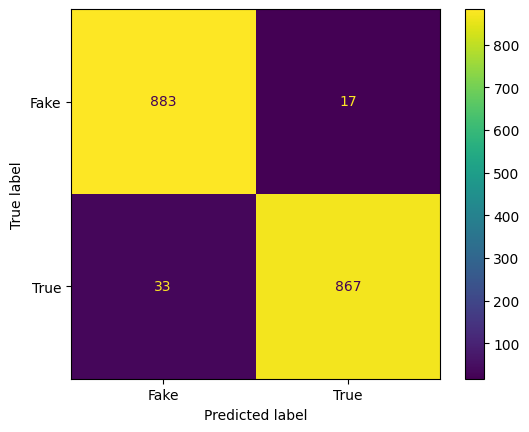

In [17]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,y_train)

y_test_pred = lr_classifier.predict(X_test)
lr_classifier_train = round(lr_classifier.score(X_train, y_train) * 100, 2)
lr_classifier_acc = round(accuracy_score(y_test_pred, y_test) * 100, 2)
print(classification_report(y_test_pred,y_test))

y_test_pred = (y_test_pred > 0.75)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()



##### Multilayer perceptron (MLP)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       976
           1       0.89      0.97      0.93       824

    accuracy                           0.93      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.93      0.93      0.93      1800



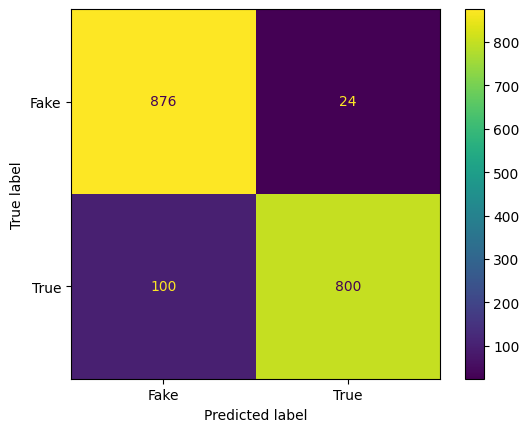

In [18]:
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train,y_train)
y_test_pred = mlp.predict(X_test)
mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_acc = round(accuracy_score(y_test_pred, y_test) * 100, 2)
print(classification_report(y_test_pred,y_test))


y_test_pred = (y_test_pred > 0.75)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()

#### Decision Tree

X_test
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       875
           1       0.92      0.90      0.91       925

    accuracy                           0.91      1800
   macro avg       0.91      0.91      0.91      1800
weighted avg       0.91      0.91      0.91      1800



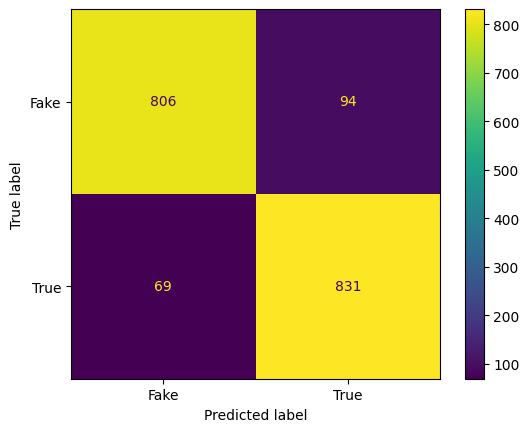

In [20]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train,y_train)
y_test_pred = decisionTree.predict(X_test)

decisionTree_train = round(decisionTree.score(X_train, y_train) * 100, 2)
decisionTree_acc = round(accuracy_score(y_test_pred, y_test) * 100, 2)
print(classification_report(y_test_pred,y_test))


y_test_pred = (y_test_pred > 0.75)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()



#### Passive Aggressive

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       919
           1       0.96      0.98      0.97       881

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800



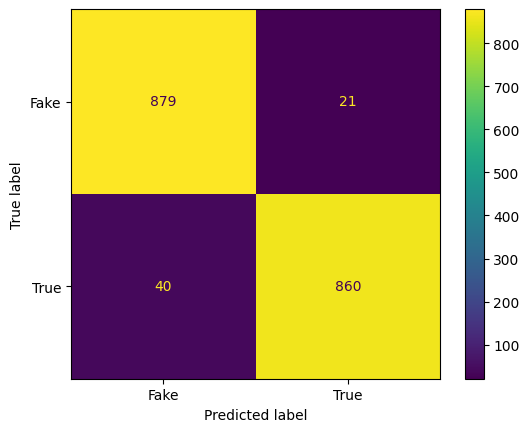

In [22]:
passive = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
passive.fit(X_train,y_train)

x_test_pred = passive.predict(X_test)
passive_train = round(passive.score(X_train, y_train) * 100, 2)
passive_acc = round(accuracy_score(y_test_pred, y_test) * 100, 2)

print(classification_report(y_test_pred,y_test))


y_test_pred = (y_test_pred > 0.75)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()

### Comparando Modelos Diferentes

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'MLPClassifier',
        'PassiveAggressiveClassifier'
    ],
    'Training Accuracy': [
        lr_classifier_train, decisionTree_trai,
        mlp_train, passive_train
    ],
    'Model Accuracy Score': [
        lr_classifier_acc, decisionTree_acc,
        mlp_acc, passive_acc
    ]
})

In [ ]:
pd.set_option('precision',2)

models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

In [22]:
news1 = 'vez pais precursor pratica esporte viria tornar febre mundial dominava modalidade fundamental sucesso nessa atividade pioneirismo expertise nao salvam porem brasil enfrentar decadencia notoria cenario atual mma ma fase reflete lista campeoes ufc registra apenas brasileira amanda nunes neste sabado leoa vai colocar titulo jogo contra valentina shevchenko ufc defendo mma esporte individual nao disputa nacoes portanto sujeito pais nao obriga torcer claro facil sentir empatia atleta brasileiro outra nacionalidade questoes culturais aproximacao realidade embora nao regra razoes declinio resultados representantes pais esporte sao sistemicas listei cinco seguem abaixo exportacao lutar chao maior diferencial brasileiros sobre estrangeiros origem judo modalidade japonesa conhecida impor quedas adversarios versao tradicional dava prosseguimento luta solo nao faz sentido nenhum voce declarado vencedor combate porque colocou rival costas chao eis faixa preta conde koma mudou brasil ensinou tecnicas irmaos helio carlos gracie adaptaram tal forma der origem brazilian gracie queiram aconteceu comeco seculo portanto brasil quase anos frente concorrencia inicio levavam caratecas pugilistas kickboxers afins chao finalizavam problemas representantes wrestling nao melhor sorte porque derrubavam brasileiros acabavam presos estrangulamentos chaves articulacoes corpo havia raros especimes fedor emelianenko kazushi sakuraba treinamento alto nivel solo defender ate atacar brasileiros minoria aconteceu entao ofertas vantajosas especialistas irem principalmente estados unidos ensinar modalidade movimento inicio ha decada nao surpresa existam estrangeiros hoje capazes menos evitar tentativas finalizacao ganhar real posso ganhar dolar matematica simples defasagem wrestling momento nao havia certeza conseguiria finalizar rival passou essencial poder controlar onde luta iria acontecer so ponto forte nao quedar adversario embora alguns praticantes boa base judo alcancar objetivo modalidade pouca enfase nessa area porque grosso modo existem dois tipos lutadores joga baixo guardeiro fica cima passador guardeiro quer derrubado enquanto passador nunca encontrou muita resistencia levar oponentes baixo assim dinamica luta mma passou favoravel wrestlers agora bem preparados defender finalizacoes convenhamos tambem faixa preta vira faixa branca enquanto tomando soco cara alem brasil representantes estilo peculiar muay thai oriundos especial curitiba wanderlei silva mauricio shogun maiores expoentes academia chute boxe pride evento japones regras dificultavam vida especialistas quedas porque la permitido chutar pisar cabeca adversario deitado alem joelhadas rivais tres quatro apoios adeptos estilo sprawl and brawl faziam pagar cometiam minimo erro tentar chao pride porem nao existe ufc regras sao civilizadas nao so normal wrestling valorizado organizacao estados unidos potencia mundial nessa modalidade cenario nacional viciado nesse topico nao preciso alongar organizacoes mma brasil servem proposito revelar lutadores promocoes projecao internacional nenhuma critica ate ai problema revelacoes acabam enfrentando adversarios qualidade questionavel inflar cartel ai vai empresario x oferecer cliente ufc mostra ganhou lutas primeiro contrato ate assinado fato lutador nao testado verdade observa atencao bolha prospectos brasileiros ja estourou faz tempo nao ha renovacao topico anterior exemplo nao ha dominio wrestling brasil geral nao atestar qualidade ninguem ainda caminho pavimentado desafios fracos envelhecimento estrelas existe adversario implacavel invicto todos esportes tempo passa anderson silva ja nao rodrigo minotauro aposentou vitor belfort shogun wand nao errariam seguissem caminho lyoto machida ja anos inativo ha dois anos junior cigano enfrenta clara decadencia embora cedo dizer renan barao jose aldo dupla nova uniao rende menos passado ate proximo rafael anjos respeitou limites corpo migrou categoria leves onde vai encontrar clara desvantagem fisica dificuldade campeao novo demian maia finalmente vai disputar titulo vai completar anos ainda dificil esperar carreira ainda longo prosseguimento tecnologia nao misterio ninguem brasil pais desenvolvimento atravessa grave crise economia logico maioria brasileiros vai ter menos recursos tecnicos fazer preparacao adequada ate acho pais ha bons treinadores falta investimento estrutura nitido lutadores vantagem preparacao fisica exemplo brasileiro respirando boca ultimo round luta ufc rotina faz tempo enquanto atletas eua inclusive sabem dosar gas vez dar tudo si primeiro assalto curiosidade desde dezembro anderson silva conquistou titulo peso medio brasil so dormiu duas noites ter nenhum cinturao ufc rafael anjos derrotado julho amanda nunes jose aldo sagraram campeoes dois dias leoa nao companhia compatriota perdeu havaiano max holloway ha mes'
news2 = 'russia voltara usar abrigos nucleares sul crimeia ate recentemente abrigos misseis longo costa sul crimeia apenas destino turistas antigos bunkers sovieticos desintegrados abandonados serviram durante guerra fria estao voltando ativa placas colocadas torno local advertem visitantes estao prestes entrar zona proibida ministerio defesa russia morador vila proxima disse soldados russos reocuparam local bloquearam estradas acesso area base militar funcional sistema misseis afirmou crimeia fica extremo sul linha instalacoes militares russas estende norte arco atraves russia ocidental moscou ja reativou varias instalacoes construidas sovieticos regiao alem construir novas bases realocar soldados confira algumas fotos'


news = pd.DataFrame({
    'preprocessed_news': [
        news1,
        news2
    ],
    'label': [
        1,
        0
    ]
})

X = news.drop(['label'], axis = 1)
Y = news['label']

vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X).toarray()



lr_classifier = LogisticRegression()
mlp = MLPClassifier(random_state=1)

lr_classifier.fit(X_train,y_train)
mlp.fit(X_train,y_train)

MLPClassifier(random_state=1)

In [21]:
y_test_pred = lr_classifier.predict(X)
lr_classifier_train = round(lr_classifier.score(X, Y) * 100, 2)
lr_classifier_acc = round(accuracy_score(y_test_pred, Y) * 100, 2)

print(classification_report(y_test_pred,Y))


y_test_pred = (y_test_pred > 0.75)
cm = confusion_matrix(Y, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()

ValueError: Found input variables with inconsistent numbers of samples: [2, 1]

In [ ]:
y_test_pred = mlp.predict(X)
mlp_train = round(mlp.score(X, Y) * 100, 2)
mlp_acc = round(accuracy_score(y_test_pred, Y) * 100, 2)

print(classification_report(y_test_pred,Y))


y_test_pred = (y_test_pred > 0.75)
cm = confusion_matrix(Y, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        
        'MLPClassifier',
        
    ],
    'Training Accuracy': [
        lr_classifier_train,
        mlp_train
    ],
    'Model Accuracy Score': [
        lr_classifier_acc,
        mlp_acc
    ]
})

In [26]:
df = pd.read_csv('../data/test.csv')
df = df.drop(columns=['index'])
df["preprocessed_news"] = df["preprocessed_news"].apply(remover_stop_words)
df["preprocessed_news"] = df["preprocessed_news"].apply(review_cleaning)
df['label'] = df.apply(lambda row: 0 if row.label == 'fake' else 1, axis=1)

X = df.drop(['label'], axis = 1)
Y = df['label']

,label,preprocessed_news
0,fake,russia voltara usar abrigos nucleares sul crim...
1,true,cameras nao mostram outras pessoas cela garoti...
2,true,trump critica meios comunicacao cobertura refo...
3,true,golpista passa diacono pedir dinheiro catolico...
